# Using all 521 AS features, cNeuroMod friends, run encoding models with within subject 2-fold RidgeCV and FIR modeling

In [1]:
import nilearn as nl
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import glob
import os
import numpy as np
import seaborn as sns
sns.set("paper", "white")
%matplotlib inline
from nilearn import plotting
import hcp_utils as hcp
import nibabel as nb
# from plotting import decompose_dscalar, plot_dscalar
import matplotlib as mpl
import matplotlib.pyplot as plt
import analysis
import utility
mpl.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
cleanpath='../sourcedata/data/cneuromod/brain/friends_clean/'
subject_flist = list(walk(cleanpath))[0][1]

In [3]:
subject_flist

['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06']

## run one subject one movie

In [11]:
#img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii'
img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean.dtseries.nii'
img = nb.load(img_file)
Y = img.get_fdata()
scaler = StandardScaler()
Y = scaler.fit_transform(Y)
X_as = np.load(f'../sourcedata/data/cneuromod/features/s1/s1friends_s01e02a_as_scores.npy')
X= utility.downsample(X_as, Y.shape[0])
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
#X.shape
X=analysis.model_FIR(X)
X = X[10:-10] #remove the first and last 10 TRs
Y = Y[10:-10]

n_splits=2
scores_mean,corr_mean,weights_mean=analysis.simple_ridgeCV(X,Y,n_splits)
analysis.plot_results(scores_mean,'r2','32k',vertex_info=None,subject='sub-01',feature='as_scores',dataset='friends',title='encoding_s01e02a_FIR')

/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/nilearn_plotting_custom.py:184: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True val

[-0.36700761 -0.35470162 -0.35271349 ...  0.55441274  0.55839711
  2.        ]
[-0.25281693 -0.24760802 -0.24754381 ...  0.54622965  0.54669143
  2.        ]
[-0.36700761 -0.35470162 -0.35271349 ...  0.55441274  0.55839711
  2.        ]
[-0.25281693 -0.24760802 -0.24754381 ...  0.54622965  0.54669143
  2.        ]


## Run a single sub grayordinate-wise across a session (4 movies)

In [ ]:
Y_a=[]
X_a=[]
ses_folder='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/*.dtseries.nii'
for run in glob.glob(f'{ses_folder}'):
    run_file=os.path.basename(run)
    task=run_file[20:27]
    print(task)
    #img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii'
    #img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean.dtseries.nii'

    img = nb.load(f'{run}')
    Y = img.get_fdata()
    scaler = StandardScaler()
    Y = scaler.fit_transform(Y)

    X_as = np.load(f'../sourcedata/data/cneuromod/features/s1/s1friends_{task}_as_scores.npy')


    X= utility.downsample(X_as, Y.shape[0])
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    #X.shape
    X=analysis.model_FIR(X)
    X = X[10:-10] #remove the first and last 10 TRs
    Y = Y[10:-10]
    
        
    X_a.append(X)
    Y_a.append(Y)
    
X_all=np.vstack(X_a)
Y_all=np.vstack(Y_a)

n_splits=4
scores_mean,corr_mean,weights_mean=analysis.simple_ridgeCV(X_all,Y_all,n_splits)
analysis.plot_results(scores_mean,'r2','32k',vertex_info=None,subject='sub-01',feature='as_scores',dataset='friends',title='encoding_ses-01_FIR')

## Run a single sub across a session parcel-wise

In [ ]:
Y_a=[]
X_a=[]
ses_folder='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/*.ptseries.nii'
for run in glob.glob(f'{ses_folder}'):
    run_file=os.path.basename(run)
    task=run_file[20:27]
    print(task)
    #img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii'
    #img_file='../sourcedata/data/cneuromod/brain/friends_clean/sub-01/ses-001/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_clean.dtseries.nii'

    img = nb.load(f'{img_file}')
    Y = img.get_fdata()
    scaler = StandardScaler()
    Y = scaler.fit_transform(Y)

    X_as = np.load(f'../sourcedata/data/cneuromod/features/s1/s1friends_{task}_as_scores.npy')


    X= utility.downsample(X_as, Y.shape[0])
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    #X.shape
    X=analysis.model_FIR(X)
    X = X[10:-10] #remove the first and last 10 TRs
    Y = Y[10:-10]
        
        
    X_a.append(X)
    Y_a.append(Y)
X_all=np.vstack(X_a)
Y_all=np.vstack(Y_a)

n_splits=4
scores_mean,corr_mean,weights_mean=analysis.simple_ridgeCV(X_all,Y_all,n_splits)
analysis.plot_results(hcp.unparcellate(scores_mean, hcp.mmp),'r2','32k',vertex_info=None,subject='sub-01',feature='as_scores',dataset='friends',title='encoding_ses-01-parcels')


## run for all subjects and save the results as .npy files

*SHOULD SAVE AS H5 FILES - and maybe take the mean over FIR

In [ ]:
#also can run by subject in cneuromod_encoding.py and run_cneuromod_encoding.sh
data_type='dtseries'
n_splits=2
cleanpath='../sourcedata/data/cneuromod/brain/friends_clean/'
subject_flist = list(os.walk(cleanpath))[0][1]
for sub in subject_flist:
    sub_folder=f'../sourcedata/data/cneuromod/brain/friends_clean/{sub}/'
    for ses_folder in glob.glob(f'{sub_folder}*'):
        for run in glob.glob(f'{ses_folder}/*.{data_type}.nii'):
            run_file=os.path.basename(run)
            ses=run_file[7:14]
            task=run_file[20:27]
            season=task[2:3]
            print(sub,ses,task)
            output_file=f'../outputs/encoding_model/cneuromod/friends/as_encoding/{sub}_{ses}_{task}'

            if os.path.exists(f'{output_file}_weights.npy'):
                print(f'found {output_file}, skipping')
            else:
                try:
                    img = nb.load(f'{run}')
                    Y = img.get_fdata()
    #                 scaler = StandardScaler()
    #                 Y = scaler.fit_transform(Y)
                    X_as = np.load(f'../sourcedata/data/cneuromod/features/s{season}/s{season}friends_{task}_as_scores.npy')
                    X= utility.downsample(X_as, Y.shape[0])
                    # scaler = StandardScaler()
                    # X = scaler.fit_transform(X)
                    #X.shape
                    X=analysis.model_FIR(X)
                    X = X[6:] #remove the first 6 TRs
                    Y = Y[6:]
                    scores_mean,corr_mean,weights_mean=analysis.simple_ridgeCV(X,Y,n_splits)
                    np.save(f'{output_file}_scores.npy', scores_mean, allow_pickle=True)
                    np.save(f'{output_file}_weights.npy', weights_mean, allow_pickle=True)
                    analysis.plot_results(scores_mean,'r2','32k',vertex_info=None,subject=sub,feature='as_scores',dataset='friends_as_encoding',title=f'RidgeCV_FIR_{task}')
                except:
                    print('something went wrong, skipping')

## take a look at some encoding model results

In [3]:
scores=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_scores.npy')
weights=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_weights.npy')


In [8]:
scores.shape

analysis.plot_results(scores,'r2','32k',vertex_info=None,subject='sub-01',feature='as_scores',dataset='friends_as_encoding',title=f'RidgeCV_FIR_s01e02a')


[-0.48033464 -0.47404076 -0.47094864 ...  0.56080565  0.56388522
  2.        ]
[-0.43353929 -0.43337577 -0.427627   ...  0.553133    0.55772785
  2.        ]
[-0.48033464 -0.47404076 -0.47094864 ...  0.56080565  0.56388522
  2.        ]
[-0.43353929 -0.43337577 -0.427627   ...  0.553133    0.55772785
  2.        ]


Text(0, 0.5, 'grayordinates')

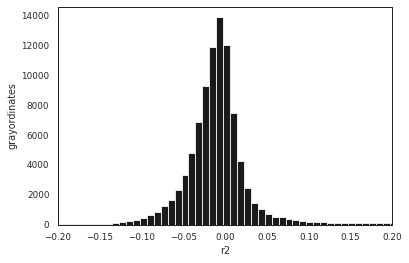

In [18]:
plt.hist(scores,150, color='k')
plt.xlim(-0.2,0.2)
plt.xlabel('r2')
plt.ylabel('grayordinates')

In [16]:
class_names, as_classes_label, as_classes, labels=utility.load_yamnet_info()

In [6]:
weights.shape

(91282, 2084)

Text(0, 0.5, 'grayordinates')

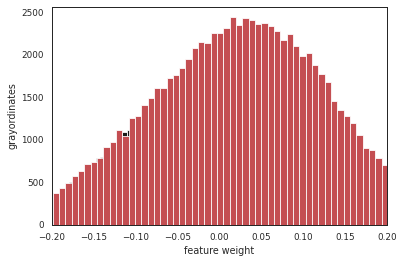

In [21]:
plt.hist(weights[:,0],150, color='k')
plt.xlim(-0.2,0.2)
plt.xlabel('feature weight')
plt.ylabel('grayordinates')

## plot the weights from the features that had the least variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X_as = np.load(f'../sourcedata/data/cneuromod/features/s1/s1friends_s01e02a_as_scores.npy')
selector = VarianceThreshold(0.001,)
selector.fit_transform(X_as).shape
class_names[selector.get_support()]

In [90]:
class_names[selector.get_support()]

array(['Speech', 'Laughter', 'Snicker', 'Chuckle, chortle', 'Music',
       'Silence', 'Inside, small room'], dtype='<U40')

In [84]:
np.nonzero(selector.get_support())[0]

array([  0,  13,  16,  18, 132, 494, 500])

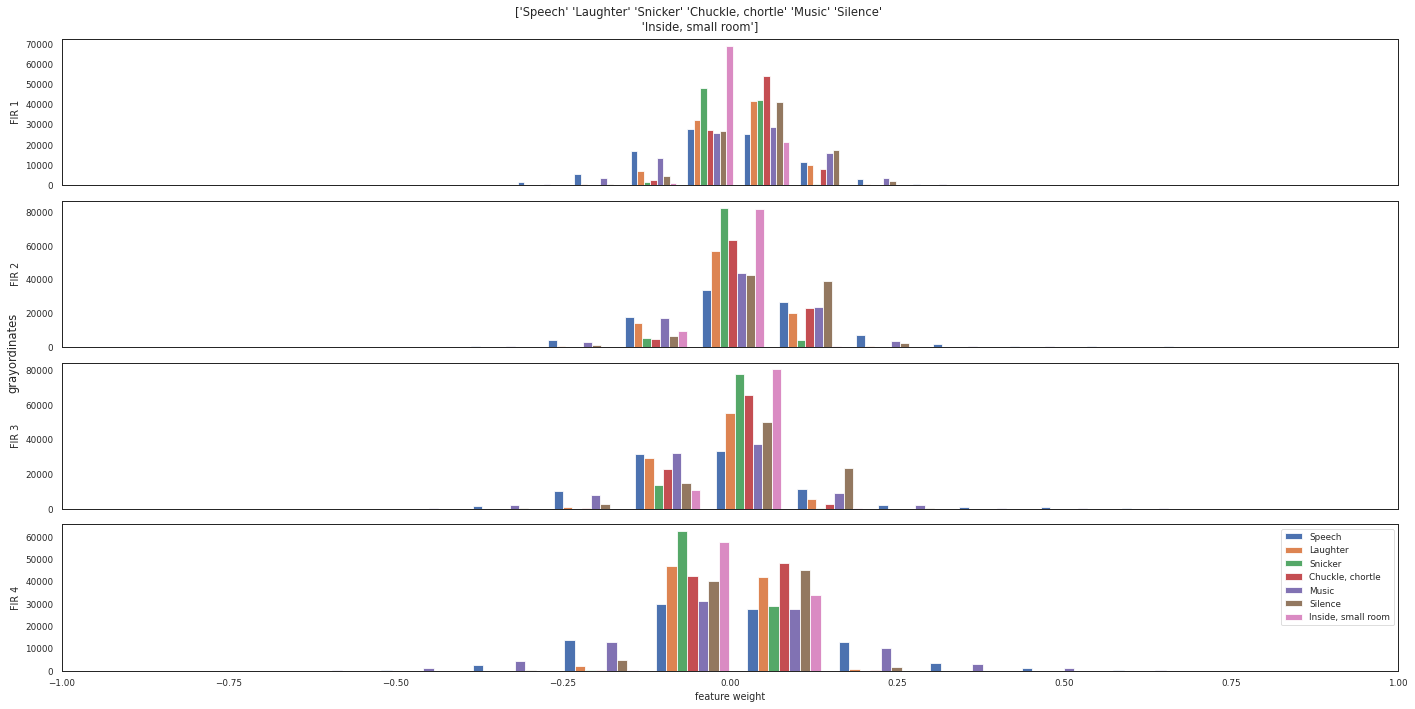

In [104]:
#for feature in [0,10,132]:
for feature in [np.nonzero(selector.get_support())[0]]:

    fig, axs = plt.subplots(4, 1, sharex=True, tight_layout=True, figsize=(20,10))
    fig.supylabel('grayordinates')
    fig.suptitle(f'{class_names[feature]}')
    # We can set the number of bins with the *bins* keyword argument.
    for i in [0,1,2,3]:
        axs[i].hist(weights[:,(i*521)+feature],10)
        axs[i].set_ylabel(f'FIR {i+1}')

    plt.xlim(-1,1)
    plt.xlabel('feature weight')
labels= class_names[selector.get_support()]
plt.legend(labels)

In [98]:
np.nonzero(selector.get_support())[0]

array([  0,  13,  16,  18, 132, 494, 500])

In [121]:
weights_list=np.array_split(weights,4,axis=1)
weights_max=np.max(weights_list,axis=0)
weights_mean=np.mean(weights_list,axis=0)

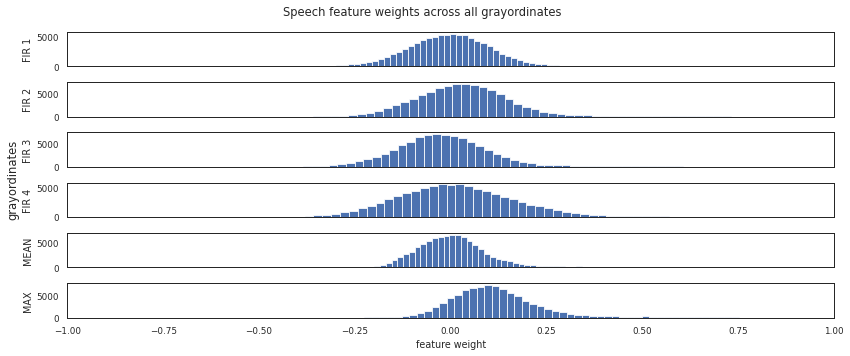

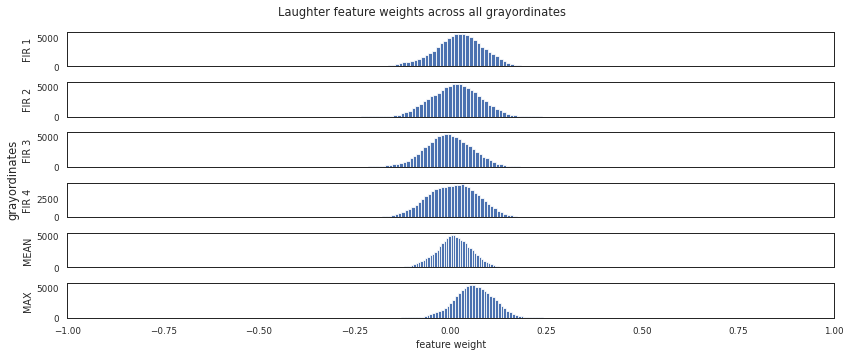

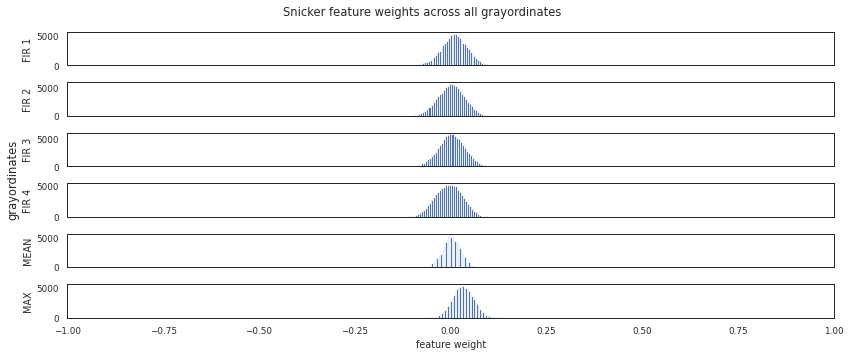

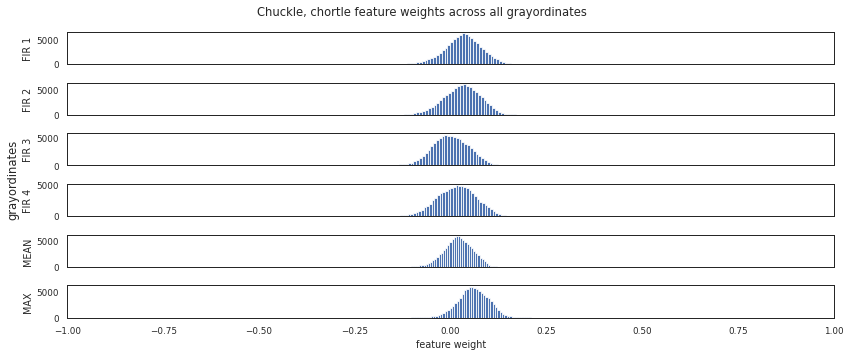

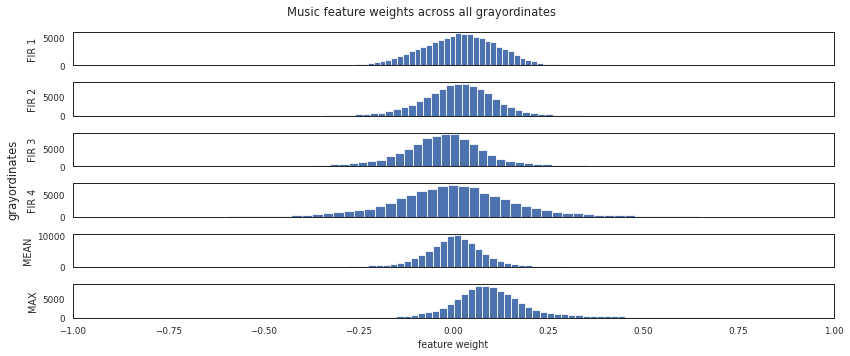

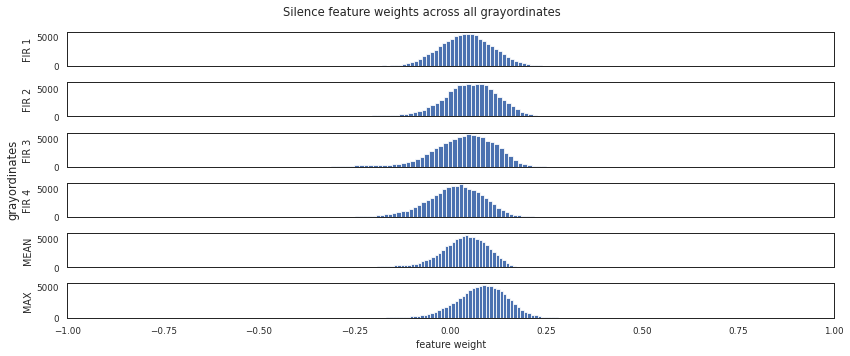

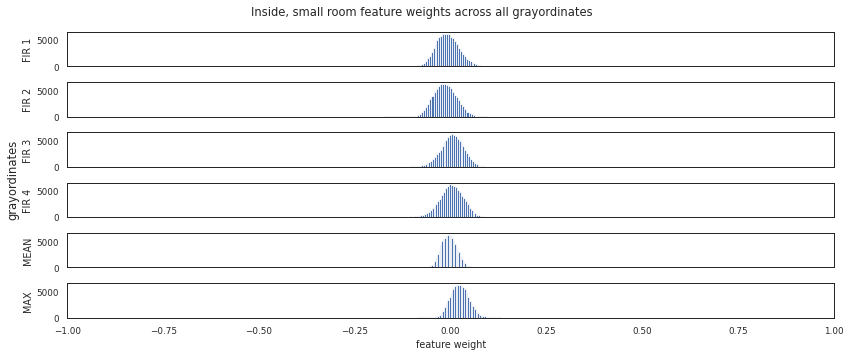

In [126]:
#for feature in [0,10,132]:
for feature in np.nonzero(selector.get_support())[0]:
    fig, axs = plt.subplots(6, 1, sharex=True, tight_layout=True, figsize=(12,5))
    fig.supylabel('grayordinates')
    fig.suptitle(f'{class_names[feature]} feature weights across all grayordinates')
    # We can set the number of bins with the *bins* keyword argument.
    for i in [0,1,2,3]:
        axs[i].hist(weights[:,(i*521)+feature],50)
        axs[i].set_ylabel(f'FIR {i+1}')
    axs[4].hist(weights_mean[:,feature],50)
    axs[4].set_ylabel(f'MEAN')

    axs[5].hist(weights_max[:,feature],50)
    axs[5].set_ylabel(f'MAX')

    plt.xlim(-1,1)
    plt.xlabel('feature weight')
# labels= class_names[selector.get_support()]
# plt.legend(labels)

## plot just the high r2 ones

In [124]:
weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')

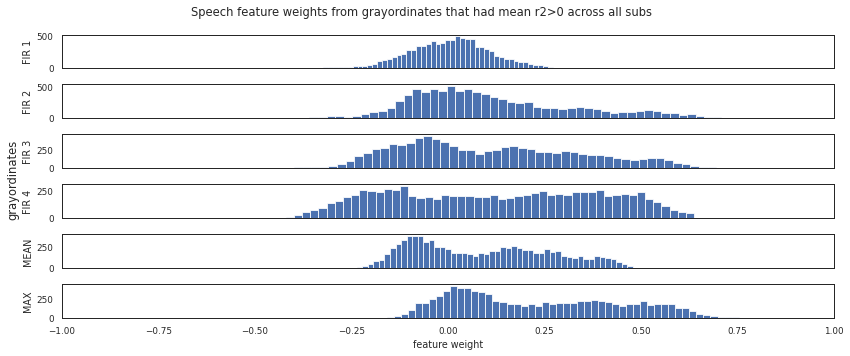

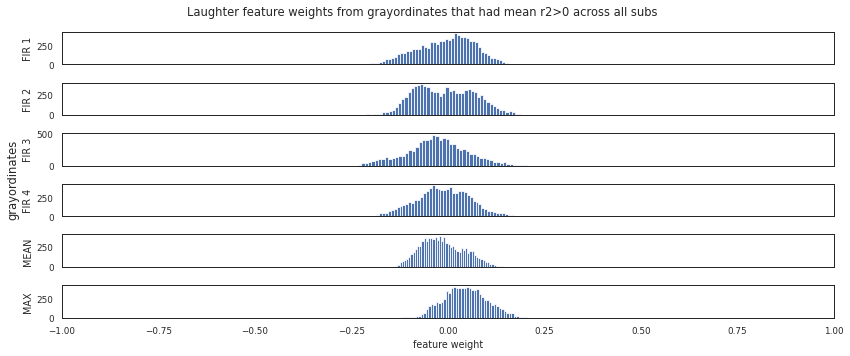

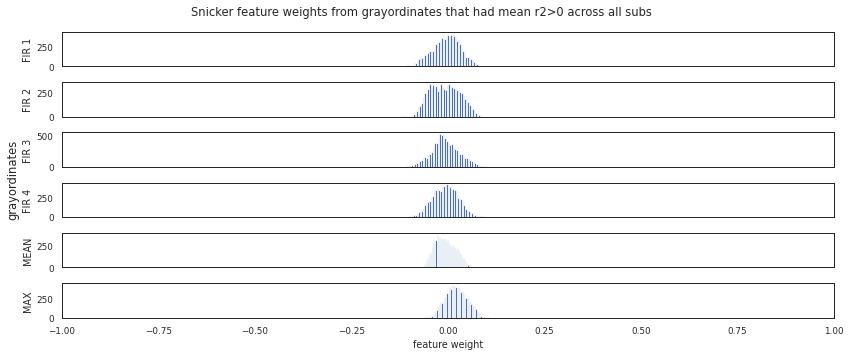

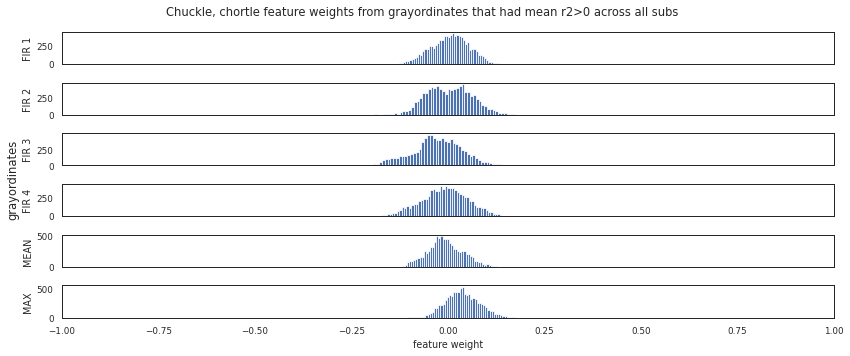

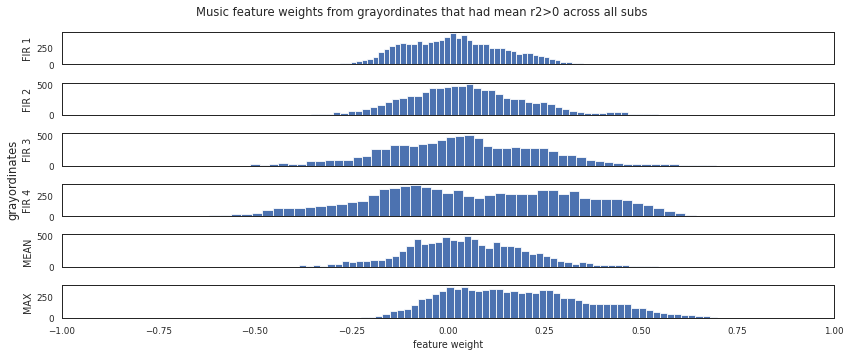

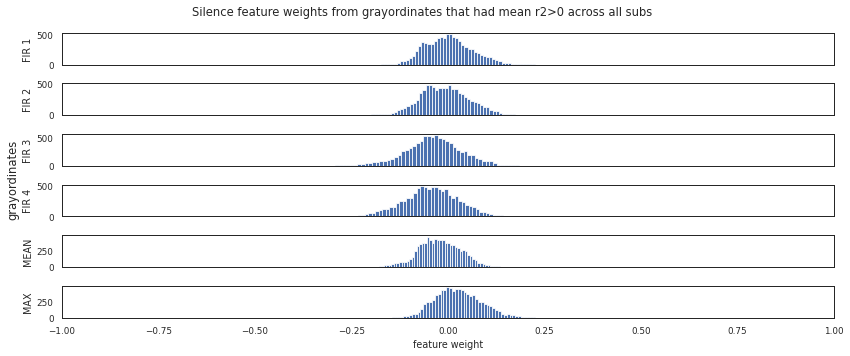

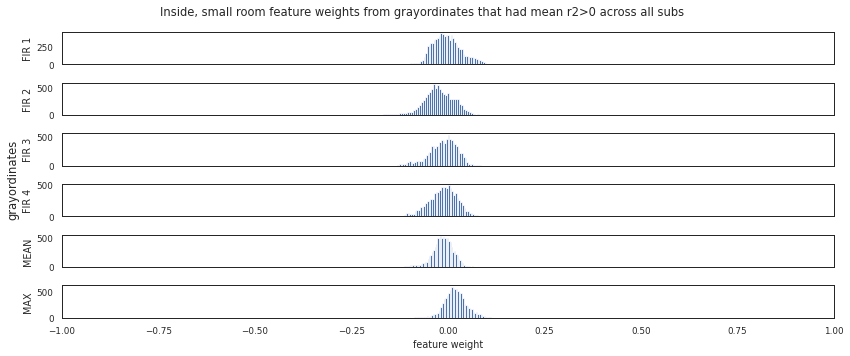

In [127]:
#for feature in [0,10,132]:
for feature in np.nonzero(selector.get_support())[0]:
    fig, axs = plt.subplots(6, 1, sharex=True, tight_layout=True, figsize=(12,5))
    fig.supylabel('grayordinates')
    fig.suptitle(f'{class_names[feature]} feature weights from grayordinates that had mean r2>0 across all subs')
    # We can set the number of bins with the *bins* keyword argument.
    for i in [0,1,2,3]:
        axs[i].hist(weights[weight_indices,(i*521)+feature],50)
        axs[i].set_ylabel(f'FIR {i+1}')
    axs[4].hist(weights_mean[weight_indices,feature],50)
    axs[4].set_ylabel(f'MEAN')

    axs[5].hist(weights_max[weight_indices,feature],50)
    axs[5].set_ylabel(f'MAX')

    plt.xlim(-1,1)
    plt.xlabel('feature weight')
# labels= class_names[selector.get_support()]
# plt.legend(labels)

## look at the encoding model weights

In [2]:
scores=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_scores.npy')
weights=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_weights.npy')
weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')

weights_list=np.array_split(weights,4,axis=1)
weights_max=np.max(weights_list,axis=0)
weights_mean=np.mean(weights_list,axis=0)

In [8]:
weights_max.shape

(91282, 521)

In [11]:

# #plot mean weights of each component
# for c in np.arange(3):
#     current_vx = S_mean[:,c]
#     r2_91k = np.zeros(91282)
#     r2_91k[:] = 0
#     #r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]
#     r2_91k[weight_indices] = current_vx#[:len(r2_roi_91k_ind)]
analysis.plot_results(weights_max[:,132],'weights','32k',vertex_info=None,subject='sub-all',feature='as_scores',dataset='friends',title=f'music_weights')


plot_weights_max= np.zeros(91282)
plot_weights_max[weight_indices]=weights_max[:,132][weight_indices]
analysis.plot_results(plot_weights_max,'weights','32k',vertex_info=None,subject='sub-all',feature='as_scores',dataset='friends',title=f'music_weights_masked')


[0.38969362 0.39156316 0.39228825 ... 0.80466435 0.80741102 0.80775227]
[0.37820084 0.37854306 0.38133088 ... 0.84515862 0.84564759 0.8475573 ]
[0.38969362 0.39156316 0.39228825 ... 0.80466435 0.80741102 0.80775227]
[0.37820084 0.37854306 0.38133088 ... 0.84515862 0.84564759 0.8475573 ]
[0.38969362 0.39156316 0.39228825 ... 0.77813533 0.77824851 0.78213689]
[0.4111385  0.41156116 0.41194312 ... 0.84515862 0.84564759 0.8475573 ]
[0.38969362 0.39156316 0.39228825 ... 0.77813533 0.77824851 0.78213689]
[0.4111385  0.41156116 0.41194312 ... 0.84515862 0.84564759 0.8475573 ]


In [8]:
weights_max[weight_indices]

(9044, 521)

In [80]:
np.nonzero(selector.get_support())

(array([  0,  13,  16,  18, 132, 494, 500]),)